In [7]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

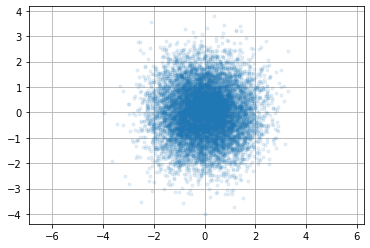

In [2]:
means = np.array([0, 0])
cov = np.array([[1, 0], [0, 1]])
n_vals = int(1e4)
vals = np.random.multivariate_normal(means, cov, size=n_vals)
plt.plot(vals[:, 0], vals[:, 1], '.', alpha=0.1)
plt.axis('equal')
plt.grid()
plt.show()

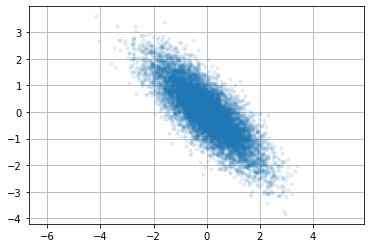

In [6]:
means = np.array([0, 0])
cov = np.array([[1, -0.8], [-0.8, 1]])
n_vals = int(1e4)
vals = np.random.multivariate_normal(means, cov, size=n_vals)
plt.plot(vals[:, 0], vals[:, 1], '.', alpha=0.1)
plt.axis('equal')
plt.grid()
plt.show()

In [9]:
pca = PCA()
pca.fit(vals)

PCA()

In [10]:
print(pca.components_)

[[-0.70877771  0.70543189]
 [-0.70543189 -0.70877771]]


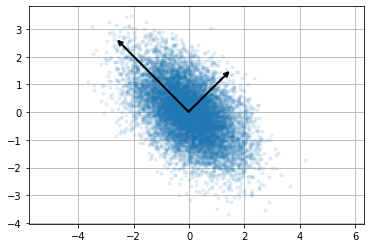

In [50]:
def draw_vector(v0, v1, ax=None, arrowstyle='->',linewidth=2):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle=arrowstyle,
                    linewidth=linewidth,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.plot(vals[:, 0], vals[:, 1], '.', alpha=0.1)
plt.axis('equal')
plt.grid()
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.show()

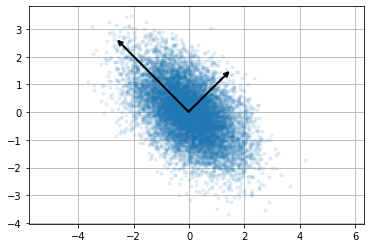

In [17]:
means = np.array([0, 0])
cov = np.array([[1, -0.5], [-0.5, 1]])
n_vals = int(1e4)
vals = np.random.multivariate_normal(means, cov, size=n_vals)
pca = PCA()
pca.fit(vals)
plt.plot(vals[:, 0], vals[:, 1], '.', alpha=0.1)
plt.axis('equal')
plt.grid()
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.show()

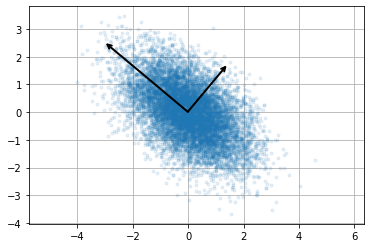

In [54]:
mat = [[1.1, 0], [0, 1]]
vals_tran = np.array(list(map(lambda x: np.matmul(mat, x), vals)))
pca_tran = PCA()
pca_tran.fit(vals_tran)
plt.plot(vals_tran[:, 0], vals_tran[:, 1], '.', alpha=0.1)
plt.axis('equal')
plt.grid()
for length, vector in zip(pca_tran.explained_variance_, pca_tran.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca_tran.mean_, pca_tran.mean_ + v)
plt.show()

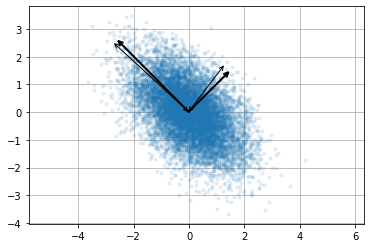

In [55]:
plt.plot(vals[:, 0], vals[:, 1], '.', alpha=0.1)
plt.axis('equal')
plt.grid()
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
for length, vector in zip(pca_tran.explained_variance_, pca_tran.components_):
    v = vector * 3 * np.sqrt(length) 
    draw_vector(pca.mean_, pca.mean_ + np.matmul(np.linalg.inv(mat), v), arrowstyle="<->",linewidth=1)
plt.show()

In [22]:
np.linalg.inv([[1, -1], [0, 1]])

array([[1., 1.],
       [0., 1.]])

In [23]:
np.matmul([[1, 1], [0, 1]], v)

array([1.77983578, 1.15886126])